In [2]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [3]:
# Read dataset

df = pd.read_csv("../../data/00-raw-data/students_adaptability_level_online_education.csv")

In [5]:
# data understanding 

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


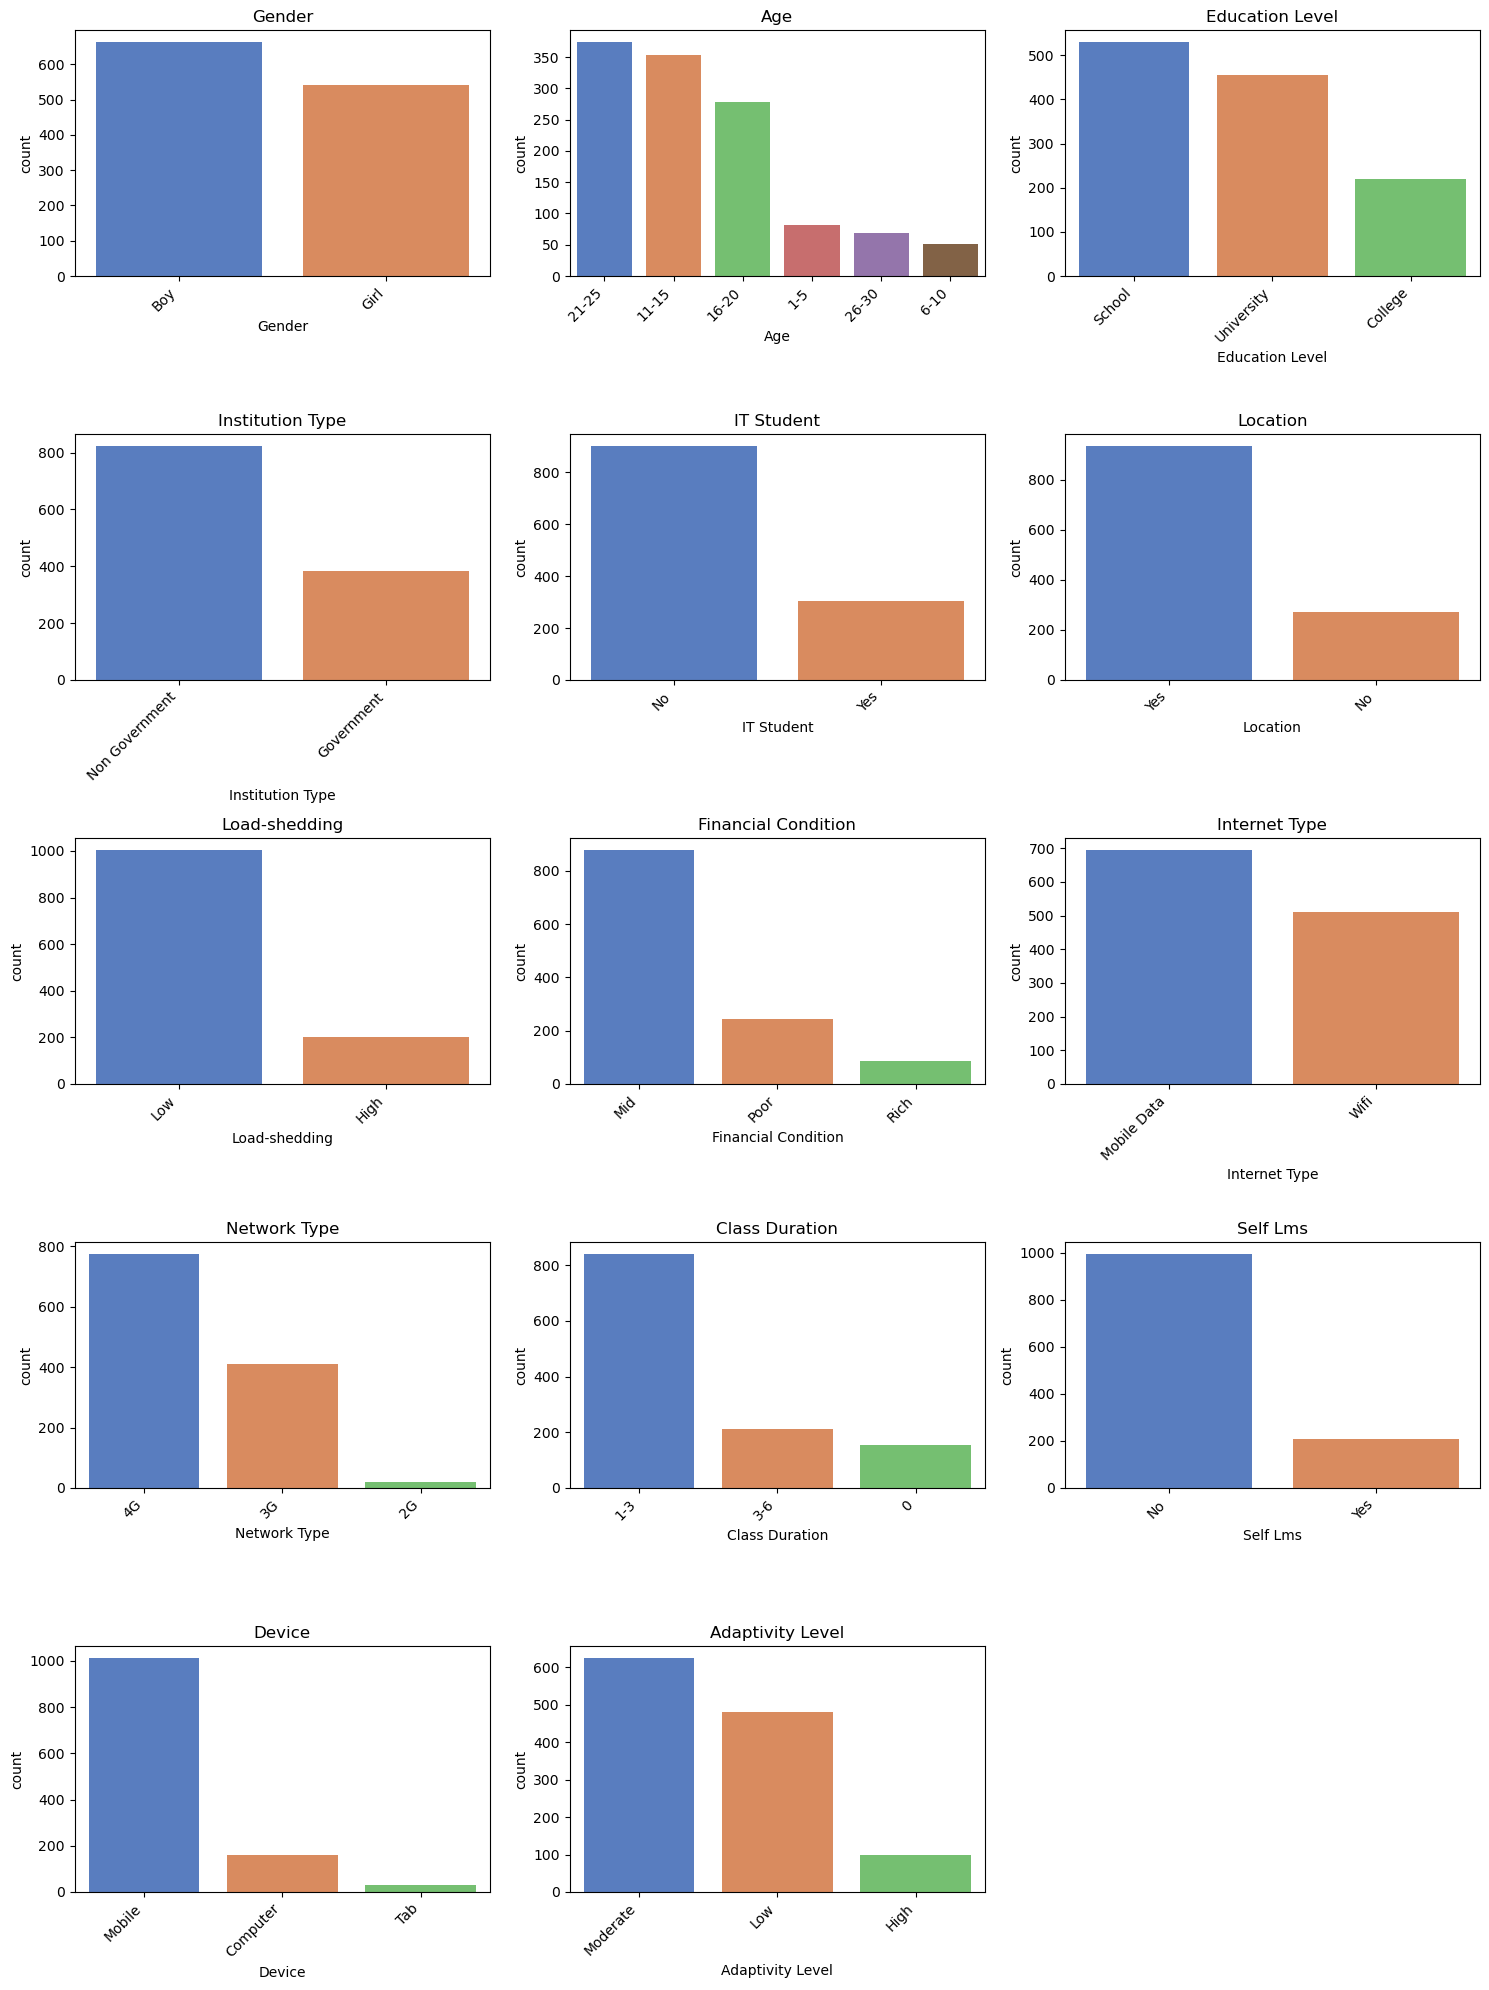

In [6]:
# Data Visualization  - Univariate Analysis:

sns.set_palette("muted")

plt.figure(figsize=(15, 20))

variables = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
             'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
             'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']

for i, variable in enumerate(variables, start=1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=variable, order=df[variable].value_counts().index)
    plt.title(variable)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

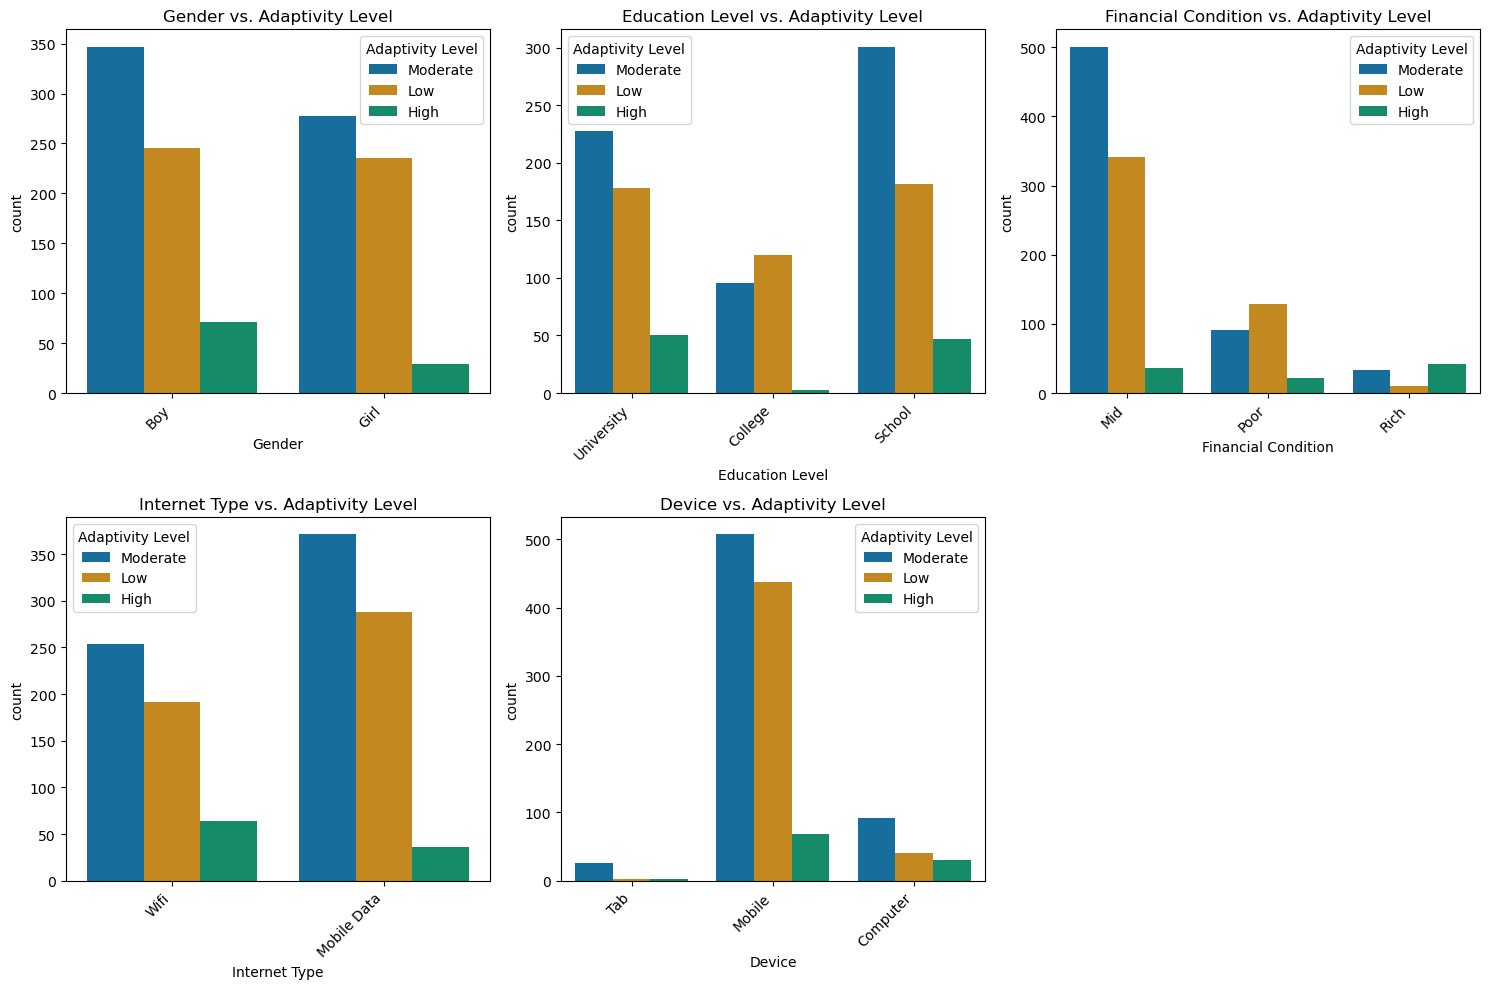

In [7]:
# Correlation Analysis - histogram 

sns.set_palette("colorblind")
plt.figure(figsize=(15, 10))

bivariate_vars = ['Gender', 'Education Level', 'Financial Condition', 'Internet Type', 'Device']

for i, variable in enumerate(bivariate_vars, start=1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=variable, hue='Adaptivity Level')
    plt.title(f'{variable} vs. Adaptivity Level')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

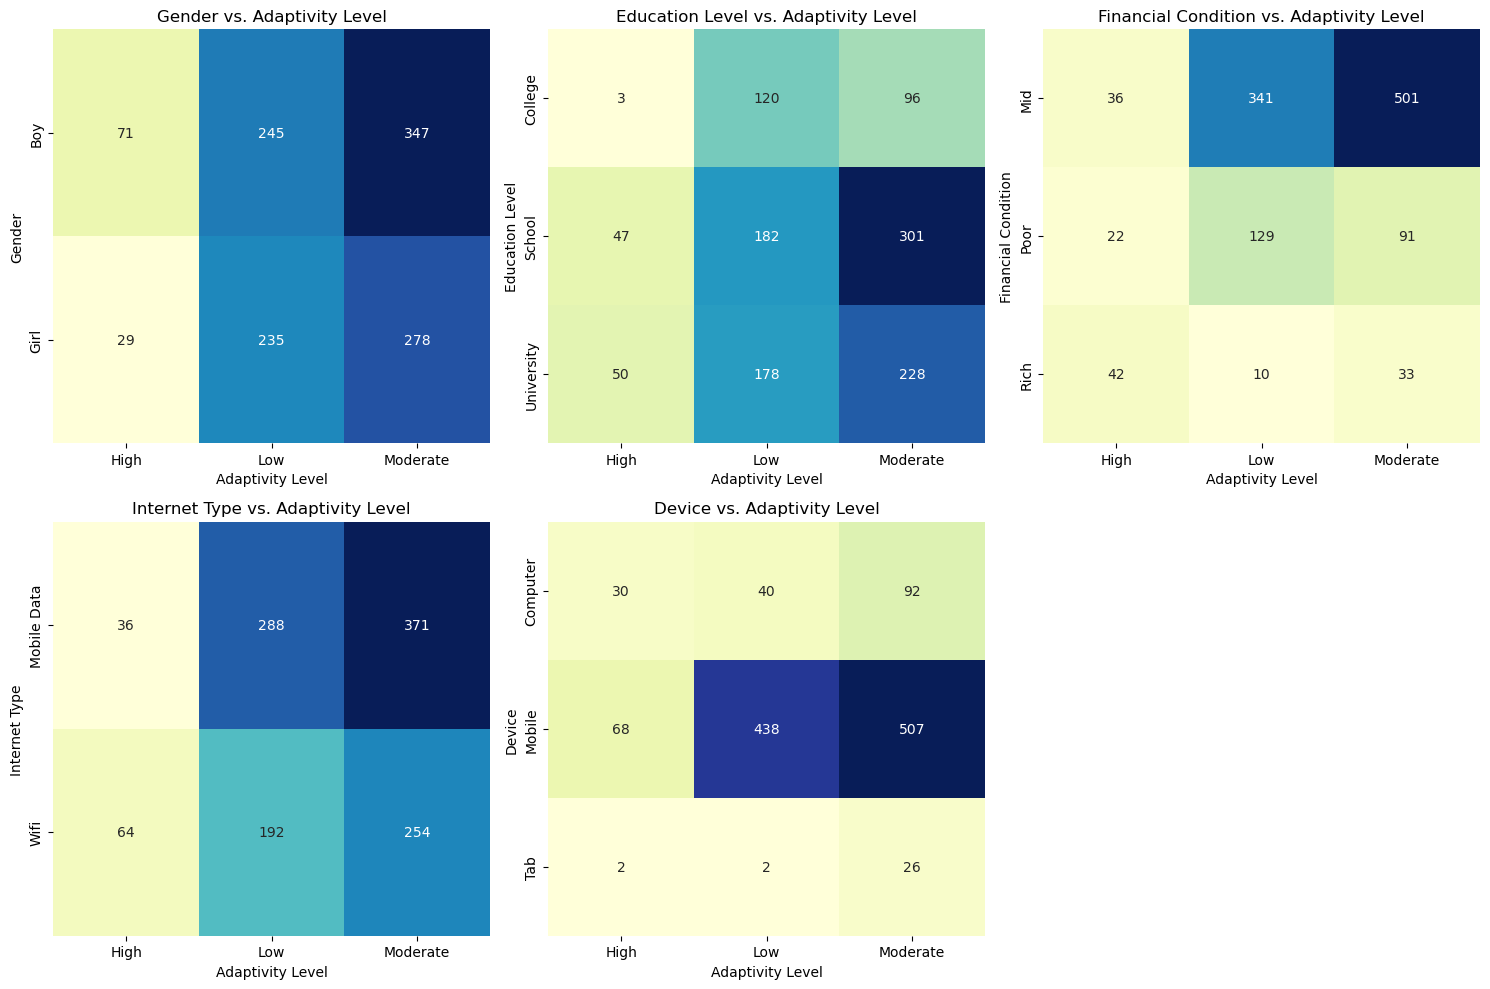

In [8]:
# Correlation Analysis - heatmap

plt.figure(figsize=(15, 10))

# Create heatmaps for contingency tables of selected variable pairs
for i, (var1, var2) in enumerate([('Gender', 'Adaptivity Level'), 
                                  ('Education Level', 'Adaptivity Level'), 
                                  ('Financial Condition', 'Adaptivity Level'), 
                                  ('Internet Type', 'Adaptivity Level'), 
                                  ('Device', 'Adaptivity Level')], start=1):
    plt.subplot(2, 3, i)
    contingency_table = pd.crosstab(df[var1], df[var2])
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title(f'{var1} vs. {var2}')
    plt.tight_layout()

plt.show() 

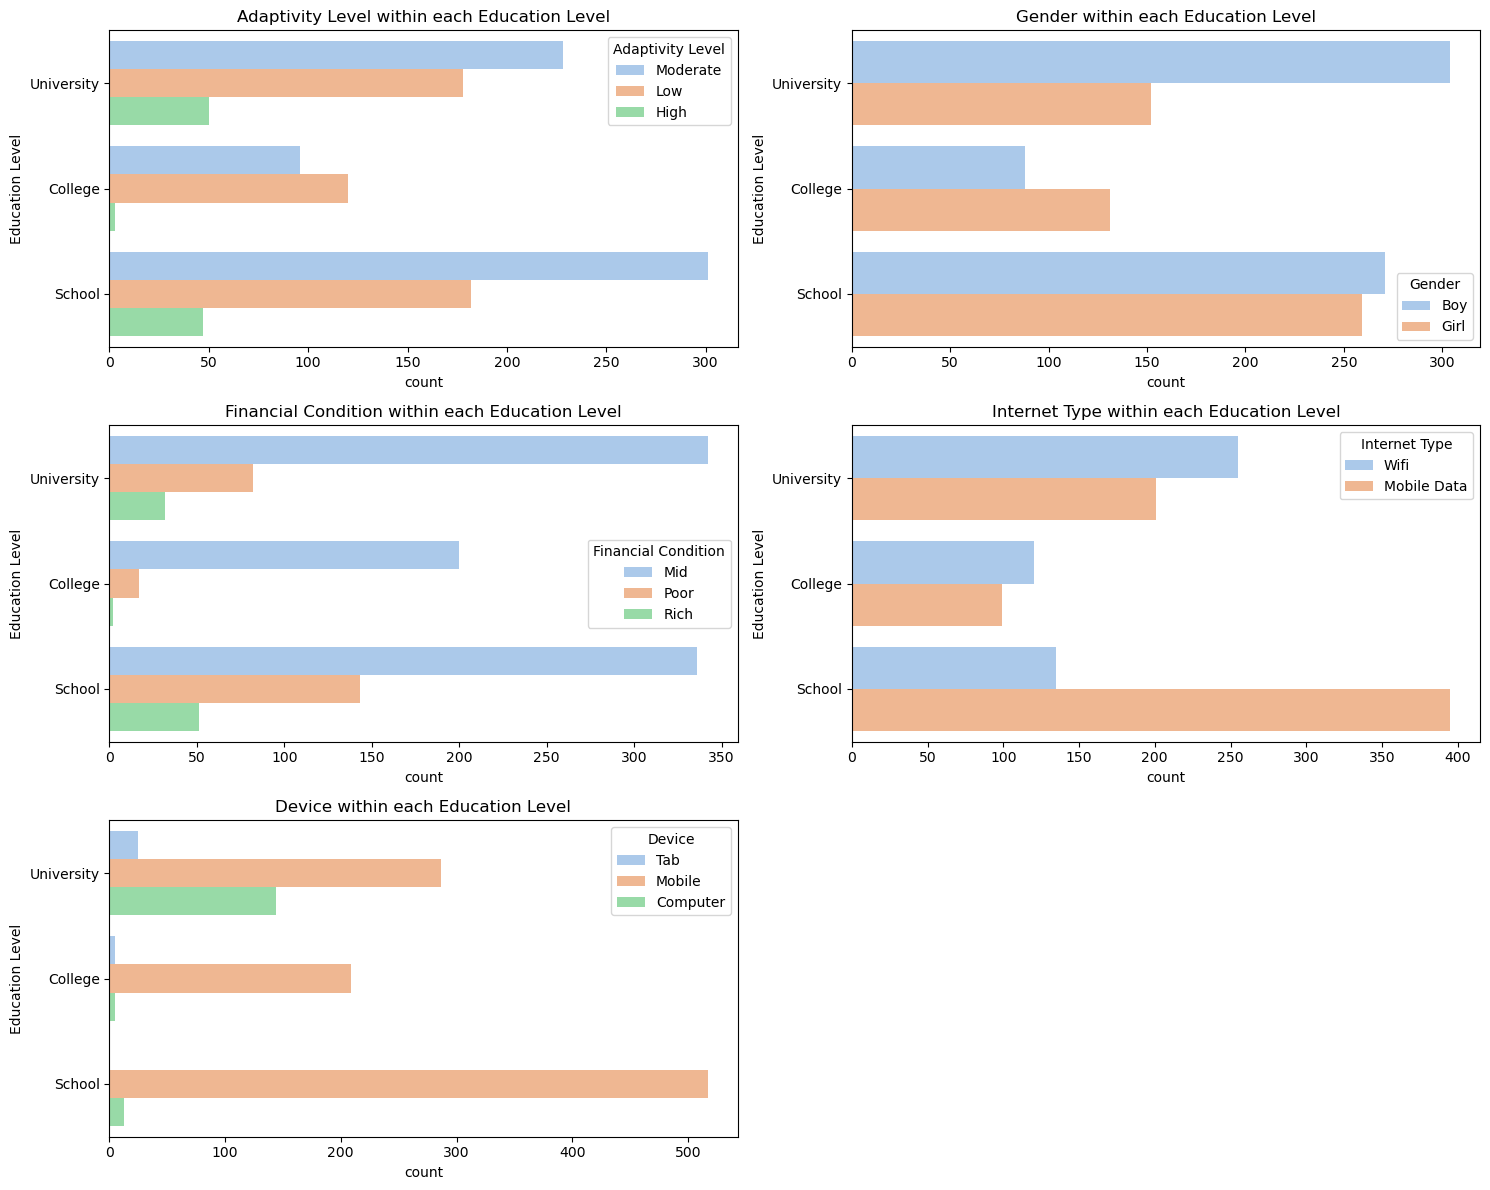

In [11]:
# Data Segmentation: focus on education level

plt.figure(figsize=(15, 12))

# Create horizontal bar plots for each variable segmented by Education Level
variables_for_analysis = ['Adaptivity Level', 'Gender', 'Financial Condition', 'Internet Type', 'Device']
for i, variable in enumerate(variables_for_analysis, start=1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, y='Education Level', hue=variable, palette="pastel", orient='h')
    plt.title(f'{variable} within each Education Level')
    plt.tight_layout()

plt.show()

In [13]:
# Identifying Outliers:
categorical_cols = df.select_dtypes(include=['object']).columns
unique_values_counts = {col: df[col].value_counts() for col in categorical_cols}
unique_values_counts

{'Gender': Boy     663
 Girl    542
 Name: Gender, dtype: int64,
 'Age': 21-25    374
 11-15    353
 16-20    278
 1-5       81
 26-30     68
 6-10      51
 Name: Age, dtype: int64,
 'Education Level': School        530
 University    456
 College       219
 Name: Education Level, dtype: int64,
 'Institution Type': Non Government    823
 Government        382
 Name: Institution Type, dtype: int64,
 'IT Student': No     901
 Yes    304
 Name: IT Student, dtype: int64,
 'Location': Yes    935
 No     270
 Name: Location, dtype: int64,
 'Load-shedding': Low     1004
 High     201
 Name: Load-shedding, dtype: int64,
 'Financial Condition': Mid     878
 Poor    242
 Rich     85
 Name: Financial Condition, dtype: int64,
 'Internet Type': Mobile Data    695
 Wifi           510
 Name: Internet Type, dtype: int64,
 'Network Type': 4G    775
 3G    411
 2G     19
 Name: Network Type, dtype: int64,
 'Class Duration': 1-3    840
 3-6    211
 0      154
 Name: Class Duration, dtype: int64,
 'Self L